<a href="https://colab.research.google.com/github/GKSJ19/ExoHabitAI/blob/AnkithaR/DP_Code_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0], comment='#', low_memory=False)

Saving PS_2026.01.02_06.39.59.csv to PS_2026.01.02_06.39.59.csv


In [ ]:
df.head()

,pl_rade,pl_masse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met,st_spectype,habitable
0,-0.036335,-0.113896,-0.005332,-0.011157,-0.127375,-0.019457,-0.634084,5.809974,-1.353649,G8 III,0
1,-0.036335,-0.113896,-0.005330,-0.010330,-0.127375,-0.019457,-0.773172,6.550465,-1.852049,G8 III,0
2,-0.036335,-0.113896,-0.005486,-0.010920,-0.127375,-0.019457,0.144601,0.045652,0.064576,G0 V,0
3,-0.036335,-0.113896,-0.005237,-0.008484,-0.127375,-0.019457,-1.196760,0.045652,0.307685,K4 III,0
4,-0.036335,-0.113896,-0.005237,-0.008558,-0.127375,-0.019457,-1.330580,0.045652,-0.024582,G0 V,0


In [ ]:
df = df[
    [
        'pl_rade',
        'pl_masse',
        'pl_orbper',
        'pl_orbsmax',
        'pl_eqt',
        'pl_dens',
        'st_teff',
        'st_lum',
        'st_met',
        'st_spectype'
    ]
]

In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39212 entries, 0 to 39211
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl_rade      27015 non-null  float64
 1   pl_masse     4744 non-null   float64
 2   pl_orbper    35871 non-null  float64
 3   pl_orbsmax   21936 non-null  float64
 4   pl_eqt       17182 non-null  float64
 5   pl_dens      2713 non-null   float64
 6   st_teff      35691 non-null  float64
 7   st_lum       9642 non-null   float64
 8   st_met       24765 non-null  float64
 9   st_spectype  2890 non-null   object 
dtypes: float64(9), object(1)
memory usage: 3.0+ MB


,0
pl_rade,12197
pl_masse,34468
pl_orbper,3341
pl_orbsmax,17276
pl_eqt,22030
pl_dens,36499
st_teff,3521
st_lum,29570
st_met,14447
st_spectype,36322


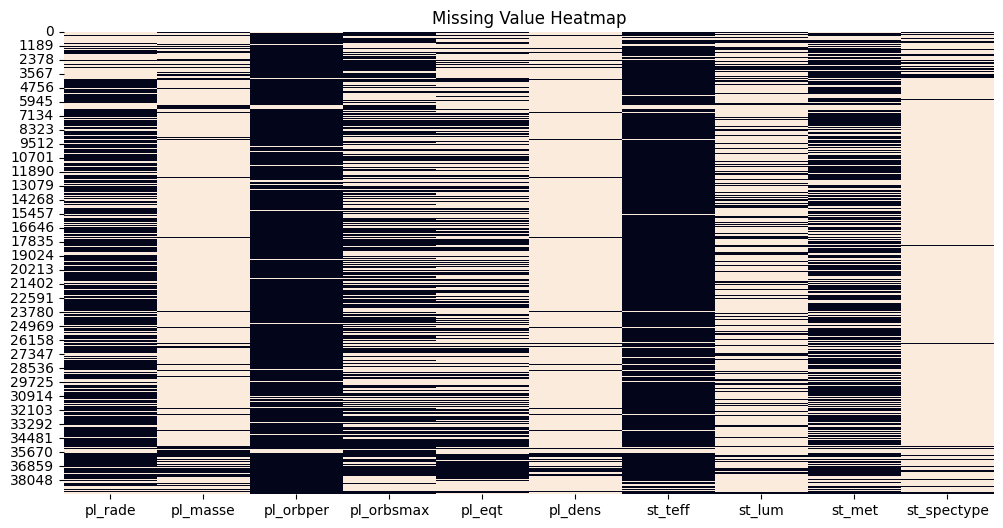

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

In [ ]:

df.duplicated().sum()

np.int64(5590)

In [ ]:
df['pl_rade'] = df['pl_rade'].fillna(df['pl_rade'].median())
df['pl_masse'] = df['pl_masse'].fillna(df['pl_masse'].median())
df['pl_orbper'] = df['pl_orbper'].fillna(df['pl_orbper'].median())
df['pl_orbsmax'] = df['pl_orbsmax'].fillna(df['pl_orbsmax'].median())
df['pl_eqt'] = df['pl_eqt'].fillna(df['pl_eqt'].median())
df['pl_dens'] = df['pl_dens'].fillna(df['pl_dens'].median())
df['st_teff'] = df['st_teff'].fillna(df['st_teff'].median())
df['st_lum'] = df['st_lum'].fillna(df['st_lum'].median())
df['st_met'] = df['st_met'].fillna(df['st_met'].median())
df['st_spectype'] = df['st_spectype'].fillna(df['st_spectype'].mode()[0])

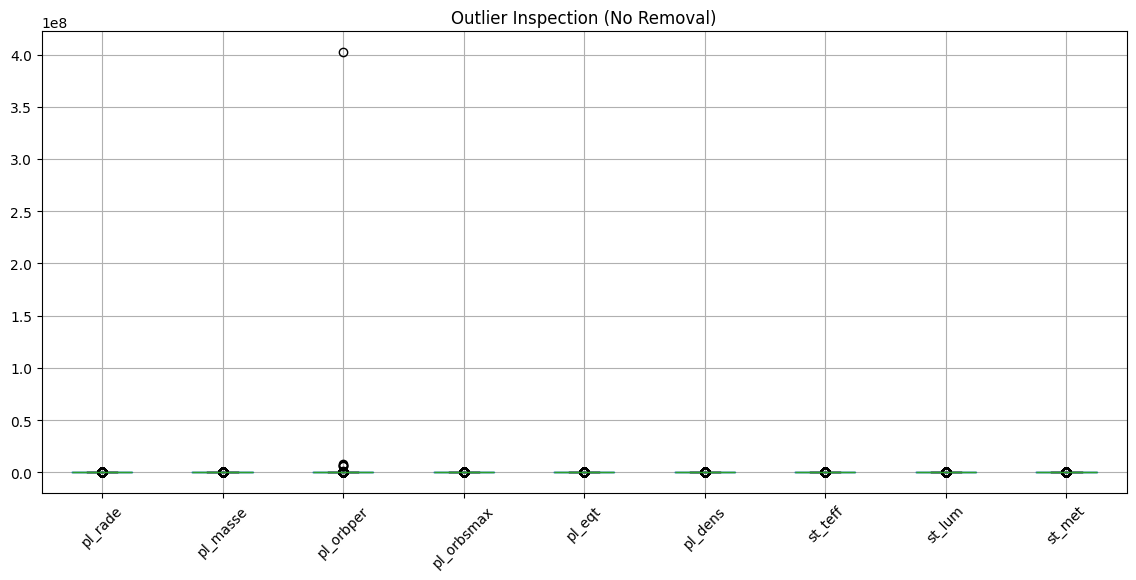

In [ ]:
plt.figure(figsize=(14, 6))
df.drop(columns=['st_spectype']).boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Inspection (No Removal)")
plt.show()

In [ ]:
df['habitable'] = (
    (df['pl_eqt'].between(200, 350)) &
    (df['pl_rade'].between(0.5, 2.0))
).astype(int)

df['habitable'].value_counts()

,count
habitable,
0,38928
1,284


In [ ]:
df['habitable'].value_counts()

scaler = StandardScaler()
features_to_scale = df.drop(columns=['habitable', 'st_spectype']).columns
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [ ]:
df_final = df[
    [
        'pl_rade',
        'pl_masse',
        'pl_orbper',
        'pl_orbsmax',
        'pl_eqt',
        'pl_dens',
        'st_teff',
        'st_lum',
        'st_met',
        'habitable'
    ]
]

In [ ]:
df_final = df_final.sample(n=5000, replace=True, random_state=42)

In [ ]:
df_final.to_csv("preprocessed.csv", index=False)
files.download("preprocessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_final.shape
df_final['habitable'].value_counts()
df_final.head()

,pl_rade,pl_masse,pl_orbper,pl_orbsmax,pl_eqt,pl_dens,st_teff,st_lum,st_met,habitable
15795,-0.036335,-0.113896,-0.005487,-0.019109,-0.127375,-0.019457,-0.258966,-0.799577,0.064576,0
860,-0.036335,-0.113896,-0.005461,-0.018303,-0.127375,-0.019457,-2.323166,-5.016690,0.064576,0
38158,-0.036335,-0.113896,-0.005490,-0.019109,-0.127375,-0.019457,0.144601,0.045652,0.064576,0
11284,-0.053925,-0.113896,-0.005487,-0.019299,0.200447,-0.019457,0.397489,0.045652,-0.467604,0
6265,-0.036335,4.137758,-0.005486,0.097611,-0.127375,-0.019457,0.144601,0.045652,0.064576,0
